In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import celltypist
import seaborn as sns
from rich import print
#from scib_metrics.benchmark import Benchmarker

/home/users/isakova/.local/lib/python3.12/site-packages/leidenalg/VertexPartition.py:388: SyntaxWarning: invalid escape sequence '\m'
  """ Implements modularity. This quality function is well-defined only for positive edge weights.
/home/users/isakova/.local/lib/python3.12/site-packages/leidenalg/VertexPartition.py:761: SyntaxWarning: invalid escape sequence '\m'
  """ Implements Reichardt and Bornholdt's Potts model with a configuration null model.
/home/users/isakova/.local/lib/python3.12/site-packages/leidenalg/Optimiser.py:7: SyntaxWarning: invalid escape sequence '\g'
  """ Class for doing community detection using the Leiden algorithm.
/home/users/isakova/.local/lib/python3.12/site-packages/leidenalg/Optimiser.py:305: SyntaxWarning: invalid escape sequence '\s'
  """ Optimise the given partitions simultaneously.


In [2]:
adata = sc.read('TSB_annotated_log1p_scvi_full_annotated.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 301515 × 46173
    obs: 'sample', 'age', 'region', 'batch', 'n_genes', 'doublet_score', 'predicted_doublet', 'high_doublet_score', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_sub_16', 'contaminants', 'cell_type_lvl1', 'leiden12_sub', 'brain', 'cell_class', 'cell_type'
    var: 'gene_ids', 'gene_id', 'gene_id_old', 'gene_name_old', 'chromosome', 'start', 'end', 'biotype', 'mt', 'n_cells_by_counts-16YO', 'mean_counts-16YO', 'log1p_mean_counts-16YO', 'pct_dropout_by_counts-16YO', 'total_counts-16YO', 'log1p_total_counts-16YO', 'highly_variable-16YO', 'n_cells_by_counts-8YO', 'mean_counts-8YO', 'log1p_mean_counts-8YO', 'pct_dropout_by_counts-8YO', 'total_counts-8YO', 'log1p_total_counts-8YO', 'highly_variable-8YO', 'n_cells_by_

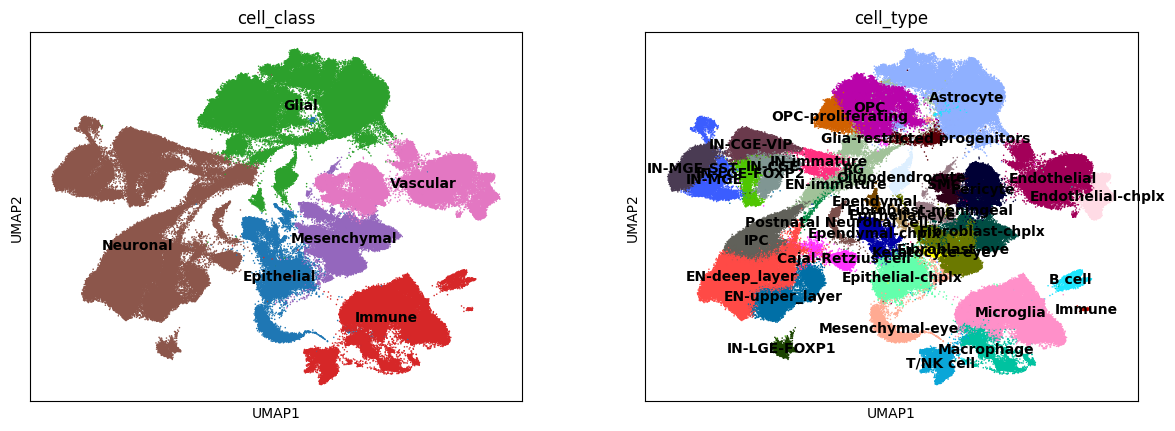

In [4]:
sc.pl.umap(adata, color=["cell_class", "cell_type"], size=5,legend_loc="on data")

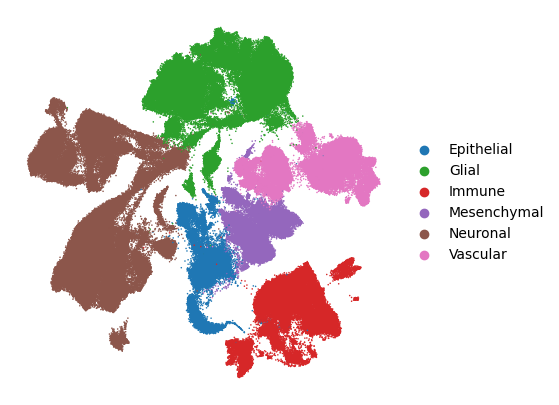

In [5]:
import matplotlib.pyplot as plt

sc.pl.umap(adata, color=["cell_class"], size=5, show=False)
# Make current figure narrower
plt.gcf().set_size_inches(5, 5)  # Width=4 inches, Height=5 inches (adjust as needed)
# Remove all titles from the current figure
for ax in plt.gcf().axes:
    ax.set_title("")
plt.axis('off')  # remove axis border
plt.savefig("umap_clean.png", dpi=300, bbox_inches='tight', pad_inches=0,transparent=True)

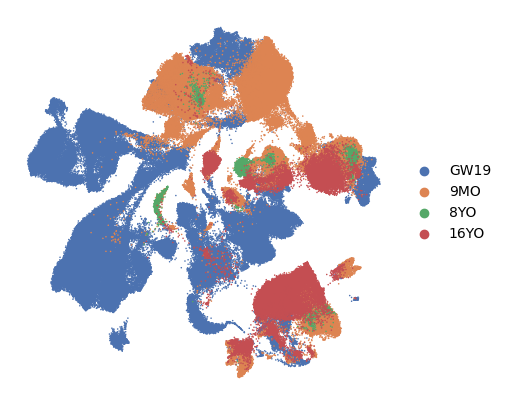

In [6]:
import matplotlib.pyplot as plt
adata.obs['age'] = pd.Categorical(adata.obs['age'], categories=['GW19', '9MO', '8YO', '16YO'], ordered=True)

sc.pl.umap(adata, color=["age"], size=5, show=False)
# Make current figure narrower
plt.gcf().set_size_inches(5, 5)  # Width=4 inches, Height=5 inches (adjust as needed)
for ax in plt.gcf().axes:
    ax.set_title("")
plt.axis('off')  # remove axis border
plt.savefig("umap_clean_age.png", dpi=300,bbox_inches='tight', pad_inches=0,transparent=True)

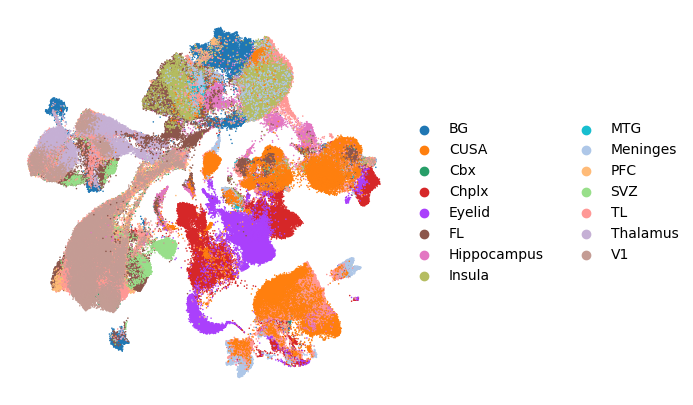

In [7]:
import matplotlib.pyplot as plt

sc.pl.umap(adata, color=["region"], size=5, show=False)
# Make current figure narrower
plt.gcf().set_size_inches(5, 5)  # Width=4 inches, Height=5 inches (adjust as needed)
for ax in plt.gcf().axes:
    ax.set_title("")
plt.axis('off')  # remove axis border
plt.savefig("umap_clean_region.png", dpi=300,bbox_inches='tight', pad_inches=0)

/home/users/isakova/.local/lib/python3.12/site-packages/scanpy/plotting/_utils.py:1352: FutureWarning: `scale` is deprecated, use `density_norm` instead
  warnings.warn(msg, FutureWarning)


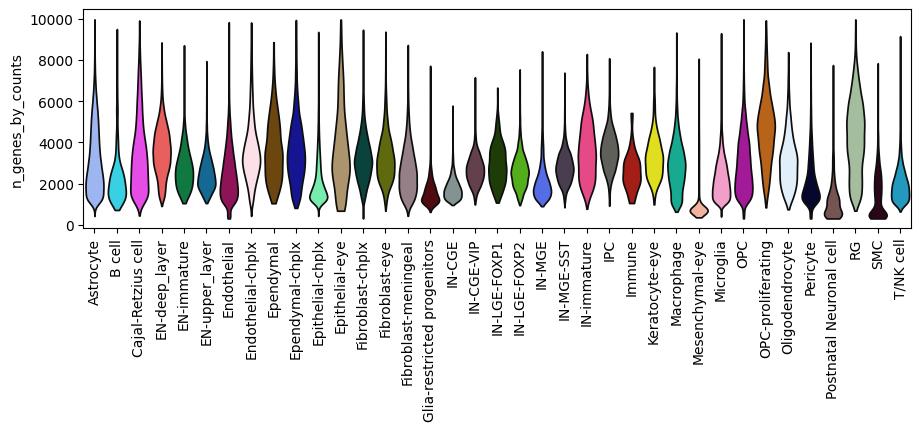

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (9, 3) 
sc.pl.violin(
    adata,
    keys='n_genes_by_counts',
    groupby='cell_type',
    rotation=90,
    stripplot=False,
    jitter=0.0,
    size=1,
    scale='width',
    save="_gene_by_cell_type.pdf"  # Saves to ./violin_gene_by_cell_type.png
)

/tmp/ipykernel_6658/1465798734.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = df.groupby(['cell_class', 'age']).size().reset_index(name='count')


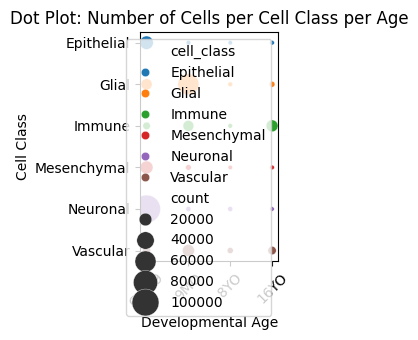

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare data
df = adata.obs[['cell_class', 'age']].copy()

# Step 2: Count number of cells per combination
cell_counts = df.groupby(['cell_class', 'age']).size().reset_index(name='count')

# Step 3: Remove zero-count rows explicitly (in case they exist)
cell_counts = cell_counts[cell_counts['count'] > 0]
# Optional: Define chronological order
age_order = ['GW19', '9MO', '8YO', '16YO']
cell_counts['age'] = pd.Categorical(cell_counts['age'], categories=age_order, ordered=True)

# Step 3: Remo combinations with zero cells (though groupby naturally skips them)
# Optional if you used .size() without unstack/fillna – you likely don't have zeros
# Step 2: Count number of cells


# Step 4: Plot
plt.figure(figsize=(3, 3.5))
sns.scatterplot(
    data=cell_counts,
    x='age',
    y='cell_class',
    size='count',
    hue='cell_class',        # <-- color by cell class
    sizes=(10, 400),         # Adjust dot size range
    palette='tab10',         # or your custom palette
    legend='brief'
)
plt.title('Dot Plot: Number of Cells per Cell Class per Age')
plt.xlabel('Developmental Age')
plt.ylabel('Cell Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cell_class_by_age.pdf", format="pdf", bbox_inches="tight")

plt.show()




/tmp/ipykernel_6658/2293905010.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = df.groupby(['cell_type', 'age']).size().reset_index(name='count')


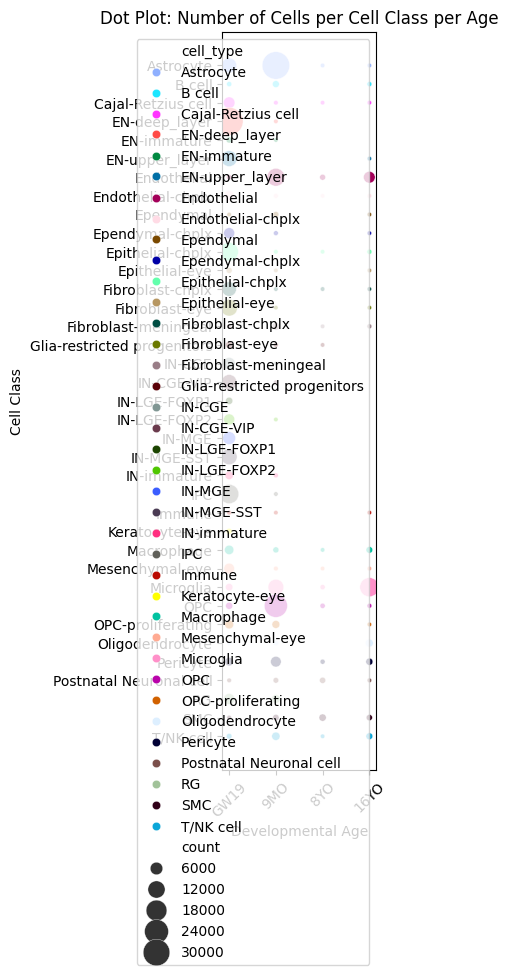

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare data
df = adata.obs[['cell_type', 'age']].copy()

# Step 2: Count number of cells per combination
cell_counts = df.groupby(['cell_type', 'age']).size().reset_index(name='count')

# Step 3: Remove zero-count rows explicitly (in case they exist)
cell_counts = cell_counts[cell_counts['count'] > 0]
# Optional: Define chronological order
age_order = ['GW19', '9MO', '8YO', '16YO']
cell_counts['age'] = pd.Categorical(cell_counts['age'], categories=age_order, ordered=True)

# Step 3: Remove combinations with zero cells (though groupby naturally skips them)
# Optional if you used .size() without unstack/fillna – you likely don't have zeros
# Step 2: Count number of cells
# Ensure 'cell_type_lvl1' is categorical
adata.obs["cell_type"] = adata.obs["cell_type"].astype("category")

# Extract Scanpy's color order
scanpy_colors = adata.uns["cell_type_colors"]
scanpy_categories = adata.obs["cell_type"].cat.categories

# Create a mapping of cell type → color
class_colors = dict(zip(scanpy_categories, scanpy_colors))

# Map to each cell
cell_class_flat = adata.obs["cell_type"].astype(str)
colors = cell_class_flat.map(class_colors)

# Step 4: Plot
plt.figure(figsize=(4, 10))
sns.scatterplot(
    data=cell_counts,
    x='age',
    y='cell_type',
    size='count',
    hue="cell_type",        # <-- color by cell class
    sizes=(10, 400),         # Adjust dot size range
    palette=class_colors,         # or your custom palette
    #legend=False,
    legend='brief'
)

plt.title('Dot Plot: Number of Cells per Cell Class per Age')
plt.xlabel('Developmental Age')
plt.ylabel('Cell Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cell_type_by_age.pdf", format="pdf", bbox_inches="tight")

plt.show()

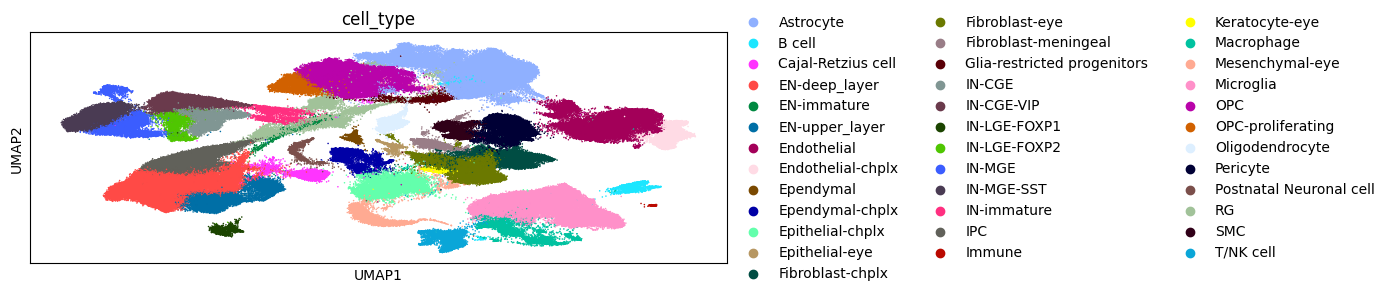

In [11]:
sc.pl.umap(adata, color=["cell_type"], size=5)

/tmp/ipykernel_6658/2032626044.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


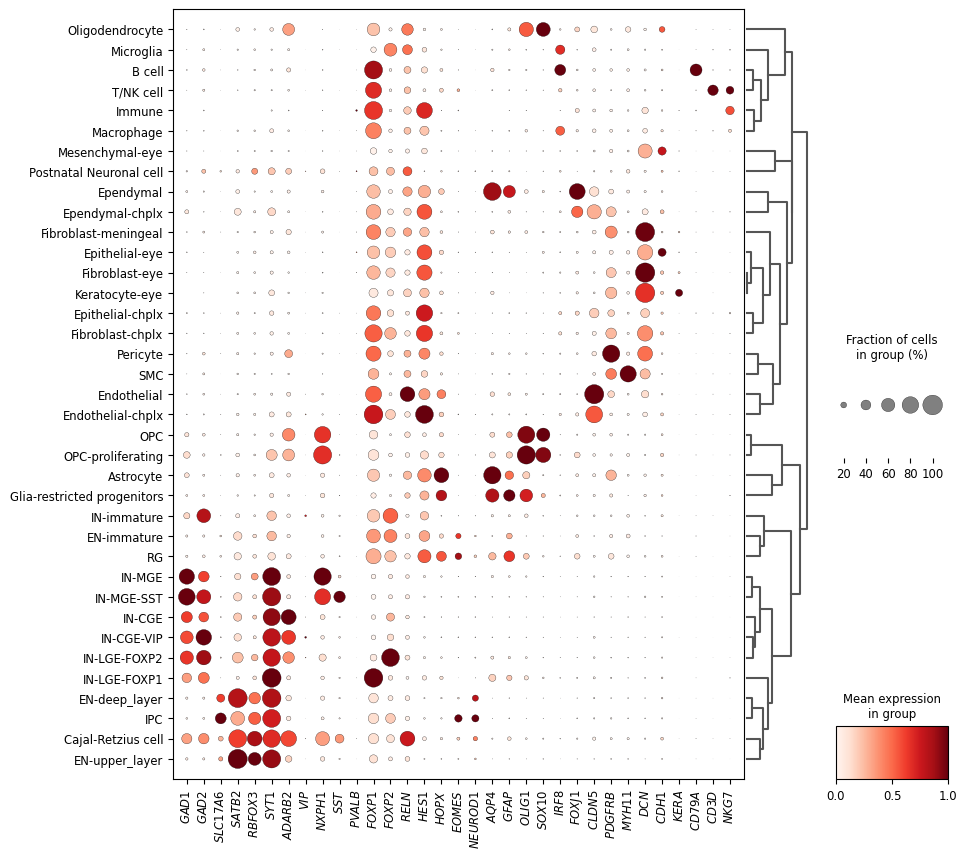

In [12]:
marker_genes = [
    #'PDGFRA', 'CSPG4', 'OLIG1',                # OPC
    'GAD1', 'GAD2', #'SLC32A1',                 # IN (Inhibitory Neuron)
    #'SOX9', 'AQP4', 'OLIG2',                   # Immature Astrocyte/OPC
    #'GFAP', 'AQP4', 'SLC1A3',                  # Astrocyte
    #'CX3CR1', 'P2RY12', 'TMEM119',             # Microglia
    #'CD68', 'CD163', 'CD14',                   # Macrophage
    #'MKI67', 'TOP2A', 'PCNA',                  # IN-cycling
    #'PTPRC', 'ITGAM', 'CD3D',                  # Immune
    #'CLDN5',           #'PECAM1', 'VWF',         # Endothelial
    #'HES1', 'VIM', 'PAX6',                     # RG
    'SLC17A6', 'SATB2',            # EN
    #'PDGFRB', 'ACTA2', 'RGS5',                 # Pericyte/SMC
   
    #'FOXJ1', 'S100B', 'CD24',                  # Chplx_Ependymal, Ependymal
                #'PTPRZ1',  # IPC
    
   
    'RBFOX3', 'SYT1',                 # Neuron
    # RG
    "ADARB2", "VIP",  "NXPH1", "SST", "PVALB", "FOXP1", "FOXP2", #"LAMP5", 
    'RELN', #'LHX1', 'TP73',                   # Cajal-Retzius, Cajal-Retzius-Hip
    "HES1",  "HOPX", 'EOMES',  'NEUROD1',#"TFAP2C", "FBXO32", "TNC",
    # EN
    # IN (pan and subtypes)
    
    #'EPCAM', 'KRT8', 'KRT18',                  # Chplx_Epithelial, Epithelial
    #'KRT14', 'KRT5', 'KRT1',                   # Epidermal/Keratinocyte
    #'COL1A2', 'FBLN1',                         # Fibroblast
    #'PITX2', 'FOXC1',                          # Mesenchymal(eye)
    #'LYVE1', 'MRC1', 'F13A1',                  # Perivascular_Macrophage
    #'SOX9', 'NFIA',                            # Glia-restricted progenitors
    # Astro
    "AQP4", "GFAP", 
    # Oligo
    "OLIG1", "SOX10", #  "BCAS1",
    # Micro
    "IRF8", 
    #
    "FOXJ1",
    'CLDN5',           #'PECAM1', 'VWF',         # Endothelial

    'PDGFRB', #'RGS5', 'KCNJ8',                 # Pericyte
    'MYH11',  #'ACTA2',       'TAGLN',         # SMC
    'DCN', #'COL1A1', 'LUM',                    # Chplx_Stromal
    'CDH1','KERA',
    'CD79A', # 'MS4A1','CD19',                  # B Cell
    'CD3D', # 'CD3E', 'CD2',                     # T Cell, T/NK Cell
    #'MBP', 'MOG', 'PLP1',                      # Oligodendrocyte
     'NKG7',# 'GNLY',      #'NCAM1',             # NK Cell
]


dp = sc.pl.dotplot(adata, marker_genes, 'cell_type', 
   show=False, 
   figsize=(10, 10),
   standard_scale="var",
   dendrogram=True)

# Get the correct axis
ax = dp['mainplot_ax']
genes_italic = [r"$\mathit{{{}}}$".format(g) for g in marker_genes]
ax.set_xticklabels(genes_italic, rotation=90)

plt.tight_layout()
plt.savefig("dotplot_cell_type_annotated.pdf")
plt.show()


In [13]:
#markers_cge = ["NR2F2", "PROX1", "SP8", "ADARB2", "VIP", "RELN", "CALB2", "CCK", "HTR3A", "SNCG"]
#markers_mge = ["LHX6", "NKX2-1", "SST", "PVALB", "SOX6", "NPY", "ERBB4"]
#markers_lge = ["MEIS2", "ISL1", "FOXP1", "FOXP2", "EBF1", "GSX2", "PPP1R1B", "DRD1", "DRD2"]
#all_markers = markers_cge + markers_mge + markers_lge
#sc.pl.dotplot(
#    adata,
#    var_names=all_markers,
#    groupby="leiden",  # or your preferred cluster column
#    dendrogram=True,
#    standard_scale="var",
#    show=True
#)


/tmp/ipykernel_6658/2774915084.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["region", "age"])
/tmp/ipykernel_6658/2774915084.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["region", "age", "cell_class"])
/tmp/ipykernel_6658/2774915084.py:50: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted = grouped.pivot_table(index=["region", "age"], columns="cell_class", values="count", fill_value=0)


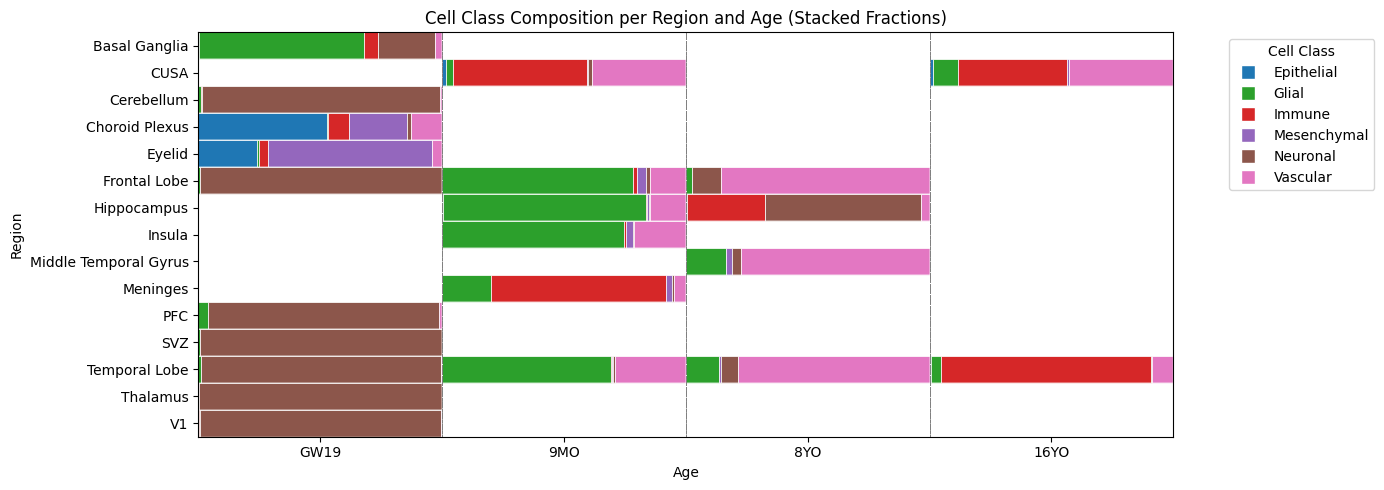

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import transforms

# Your mapping dictionary
region_map = {
    'BG': 'Basal Ganglia',
    'Cbx': 'Cerebellum',
    'Chplx': 'Choroid Plexus',
    'Eyelid': 'Eyelid',
    'FL': 'Frontal Lobe',
    'PFC': 'PFC',
    'SVZ': 'SVZ',
    'TL': 'Temporal Lobe',
    'Thalamus': 'Thalamus',
    'V1': 'V1',
    'Hippocampus': 'Hippocampus',
    'Insula': 'Insula',
    'Meninges': 'Meninges',
    'CUSA': 'CUSA',
    'MTG': 'Middle Temporal Gyrus'
}

# Step 1: Prepare summary_df and mapping
summary_df = (
    adata.obs.groupby(["region", "age"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=["GW19", "9MO", "8YO", "16YO"])
)

original_regions = summary_df.index.astype(str).tolist()
mapped_regions = [region_map.get(r, r) for r in original_regions]
summary_df.index = mapped_regions

regions = summary_df.index.tolist()
ages = summary_df.columns.tolist()

# Step 2: Prepare grouped cell class data
grouped = (
    adata.obs.groupby(["region", "age", "cell_class"])
    .size()
    .reset_index(name="count")
)
grouped["region"] = grouped["region"].map(region_map)
grouped = grouped.dropna(subset=["region"])  # in case any region not in region_map

# Pivot table: index = (region, age), columns = cell_class
pivoted = grouped.pivot_table(index=["region", "age"], columns="cell_class", values="count", fill_value=0)

# Step 3: Assign colors per cell_class
cell_classes = adata.obs["cell_class"].cat.categories.intersection(pivoted.columns)
# Step 3: Assign colors per cell_class using Scanpy's class_colors
class_colors = dict(zip(
    adata.obs["cell_class"].cat.categories,
    adata.uns["cell_class_colors"]
))

# Only keep the colors for the cell classes present in your pivoted plot
cell_class_colors = {cls: class_colors.get(cls, "#d3d3d3") for cls in pivoted.columns}

# Step 4: Manual grid plotting with **horizontal** stacked bars
fig, ax = plt.subplots(figsize=(14, 5))
for i, region in enumerate(regions):
    for j, age in enumerate(ages):
        if (region, age) in pivoted.index:
            counts = pivoted.loc[(region, age)]
            total = counts.sum()
            left = 0
            for cls in cell_classes:
                val = counts.get(cls, 0)
                width = val / total if total > 0 else 0
                trans = transforms.Affine2D().translate(j, i) + ax.transData
                ax.barh(
                    0, width, left=left, height=1,
                    color=cell_class_colors[cls],
                    edgecolor='white', linewidth=0.5,     # Thin white border
                    transform=trans, align='edge'
                )
                left += width
            # Black frame around full tile
            ax.add_patch(
                plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='white', linewidth=.3)
            )
            ax.axvline(j, color='gray', linewidth=0.5, linestyle='--')  # dashed or solid
        else:
            # Empty tile with light background
            ax.add_patch(
                plt.Rectangle((j, i), 1, 1, color="#fffdd0", edgecolor='gray', linewidth=0.8)
            )


# Step 5: Axis formatting
ax.set_xticks(np.arange(len(ages)) + 0.5)
ax.set_xticklabels(ages)
ax.set_yticks(np.arange(len(regions)) + 0.5)
ax.set_yticklabels(regions)
ax.set_xlim(0, len(ages))
ax.set_ylim(0, len(regions))
ax.invert_yaxis()
ax.set_title("Cell Class Composition per Region and Age (Stacked Fractions)")
ax.set_xlabel("Age")
ax.set_ylabel("Region")

# Step 6: Legend for cell classes
handles = [plt.Line2D([0], [0], marker='s', color='w', label=cls,
                      markerfacecolor=col, markersize=10)
           for cls, col in cell_class_colors.items()]
ax.legend(handles=handles, title="Cell Class", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("cell_class_composition_by_region_by_age.pdf", format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_6658/94791106.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["region", "age"])


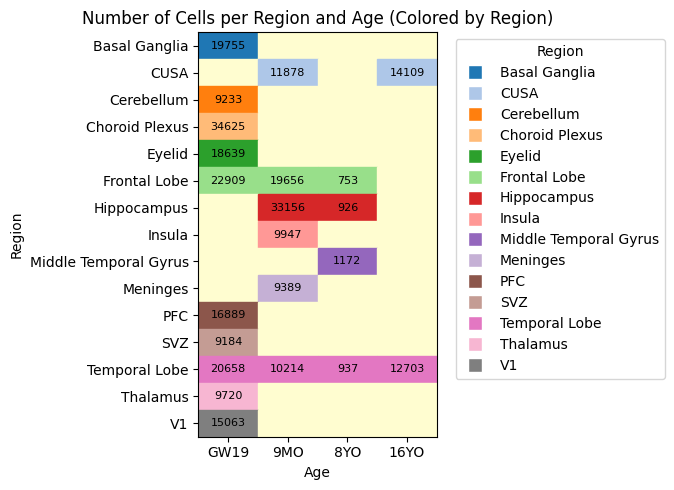

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Your mapping dictionary
region_map = {
    'BG': 'Basal Ganglia',
    'Cbx': 'Cerebellum',
    'Chplx': 'Choroid Plexus',
    'Eyelid': 'Eyelid',
    'FL': 'Frontal Lobe',
    'PFC': 'PFC',
    'SVZ': 'SVZ',
    'TL': 'Temporal Lobe',
    'Thalamus': 'Thalamus',
    'V1': 'V1',
    'Hippocampus': 'Hippocampus',
    'Insula': 'Insula',
    'Meninges': 'Meninges',
    'CUSA': 'CUSA',  # Update if you want a better label
    'MTG': 'Middle Temporal Gyrus'
}

# Create pivot table: rows = region, columns = age
summary_df = (
    adata.obs.groupby(["region", "age"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=["GW19", "9MO", "8YO", "16YO"])
)

# Map abbreviated region names to full names for the index (rows)
original_regions = summary_df.index.astype(str).tolist()
mapped_regions = [region_map.get(r, r) for r in original_regions]
summary_df.index = mapped_regions

regions = summary_df.index.tolist()
ages = summary_df.columns.tolist()

# (rest of your plotting code unchanged)


# Assign tab20 colors to regions
tab20 = plt.get_cmap("tab20")
region_colors = {region: tab20(i % 20) for i, region in enumerate(regions)}

# Plot grid manually
fig, ax = plt.subplots(figsize=(7, 5))
for i, region in enumerate(regions):
    for j, age in enumerate(ages):
        count = summary_df.loc[region, age]
        color = region_colors[region] if count > 0 else "#fffdd0"
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
        if count > 0:
            ax.text(j + 0.5, i + 0.5, str(count), ha='center', va='center', fontsize=8)

# Axis formatting
ax.set_xticks(np.arange(len(ages)) + 0.5)
ax.set_xticklabels(ages)
ax.set_yticks(np.arange(len(regions)) + 0.5)
ax.set_yticklabels(regions)
ax.set_xlim(0, len(ages))
ax.set_ylim(0, len(regions))
ax.invert_yaxis()
ax.set_title("Number of Cells per Region and Age (Colored by Region)")
ax.set_xlabel("Age")
ax.set_ylabel("Region")


# Legend
handles = [plt.Line2D([0], [0], marker='s', color='w', label=reg,
                      markerfacecolor=col, markersize=10)
           for reg, col in region_colors.items()]
ax.legend(handles=handles, title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("cell_number_by_region.pdf", format="pdf", bbox_inches="tight")

plt.show()


## Figure 4

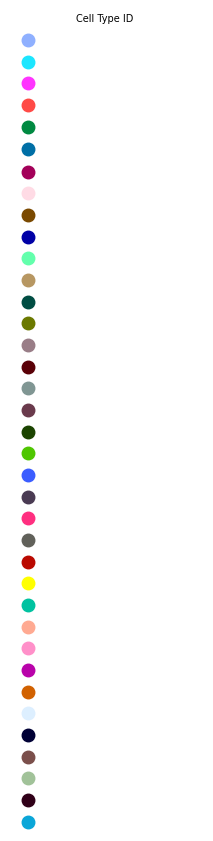

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Step 1: Create mapping from cell type to number and color
cell_type_categories = adata.obs["cell_type"].cat.categories
cell_type_colors = adata.uns["cell_type_colors"]
cell_type_to_number = {ct: str(i) for i, ct in enumerate(cell_type_categories, 1)}

# Step 2: Create handles for the legend (colored patch + numeric label)
# Step 2: Create circular legend handles (Line2D with marker='o')
handles = [
    Line2D(
        [0], [0],
        marker='o',
        color='none',
        markerfacecolor=cell_type_colors[i],
        markeredgecolor=cell_type_colors[i],
        markersize=9
        
        
        ,
        label=f"{cell_type_to_number[ct]} {ct}"  # Include number and name
    )
    for i, ct in enumerate(cell_type_categories)
]


# Step 3: Plot only the legend
fig, ax = plt.subplots(figsize=(2.5, len(handles) * 0.1))  # Adjust height for spacing

# Add legend to blank axes
legend = ax.legend(
    handles=handles,
    title="Cell Type ID",
    loc="center left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    labelspacing=1.2,         # Try values >1.0 for more space
    borderaxespad=0.5
)


# Make legend font white (optional)
for text in legend.get_texts():
    text.set_color("white")
    #text.set_fontweight('bold')
legend.get_title().set_color("black")

# Hide the axes completely
ax.axis("off")

# Save just the legend
plt.savefig("celltype_legend_only1.pdf", bbox_inches="tight")  # Set black background if desired
plt.show()


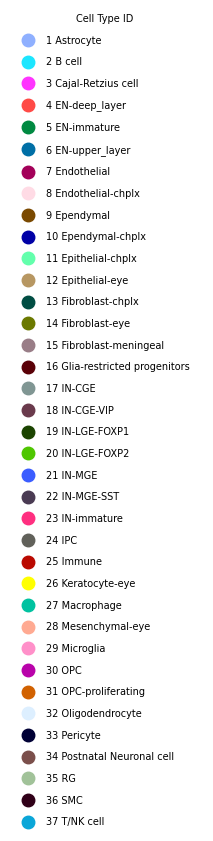

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Step 1: Create mapping from cell type to number and color
cell_type_categories = adata.obs["cell_type"].cat.categories
cell_type_colors = adata.uns["cell_type_colors"]
cell_type_to_number = {ct: str(i) for i, ct in enumerate(cell_type_categories, 1)}

# Step 2: Create handles for the legend (colored patch + numeric label)
# Step 2: Create circular legend handles (Line2D with marker='o')
handles = [
    Line2D(
        [0], [0],
        marker='o',
        color='none',
        markerfacecolor=cell_type_colors[i],
        markeredgecolor=cell_type_colors[i],
        markersize=9
        
        
        ,
        label=f"{cell_type_to_number[ct]} {ct}"  # Include number and name
    )
    for i, ct in enumerate(cell_type_categories)
]


# Step 3: Plot only the legend
fig, ax = plt.subplots(figsize=(2.5, len(handles) * 0.1))  # Adjust height for spacing

# Add legend to blank axes
legend = ax.legend(
    handles=handles,
    title="Cell Type ID",
    loc="center left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    labelspacing=1.2,         # Try values >1.0 for more space
    borderaxespad=0.5
)


# Make legend font white (optional)
for text in legend.get_texts():
    text.set_color("black")
    #text.set_fontweight('bold')
legend.get_title().set_color("black")

# Hide the axes completely
ax.axis("off")

# Save just the legend
plt.savefig("celltype_legend_only2.pdf", bbox_inches="tight")  # Set black background if desired
plt.show()


In [18]:
cell_types = list(adata.obs['cell_type'].cat.categories)
print(cell_types)

[
    'Astrocyte',
    'B cell',
    'Cajal-Retzius cell',
    'EN-deep_layer',
    'EN-immature',
    'EN-upper_layer',
    'Endothelial',
    'Endothelial-chplx',
    'Ependymal',
    'Ependymal-chplx',
    'Epithelial-chplx',
    'Epithelial-eye',
    'Fibroblast-chplx',
    'Fibroblast-eye',
    'Fibroblast-meningeal',
    'Glia-restricted progenitors',
    'IN-CGE',
    'IN-CGE-VIP',
    'IN-LGE-FOXP1',
    'IN-LGE-FOXP2',
    'IN-MGE',
    'IN-MGE-SST',
    'IN-immature',
    'IPC',
    'Immune',
    'Keratocyte-eye',
    'Macrophage',
    'Mesenchymal-eye',
    'Microglia',
    'OPC',
    'OPC-proliferating',
    'Oligodendrocyte',
    'Pericyte',
    'Postnatal Neuronal cell',
    'RG',
    'SMC',
    'T/NK cell'
]

## Non-coding gene expression by class

/tmp/ipykernel_6658/3975601767.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


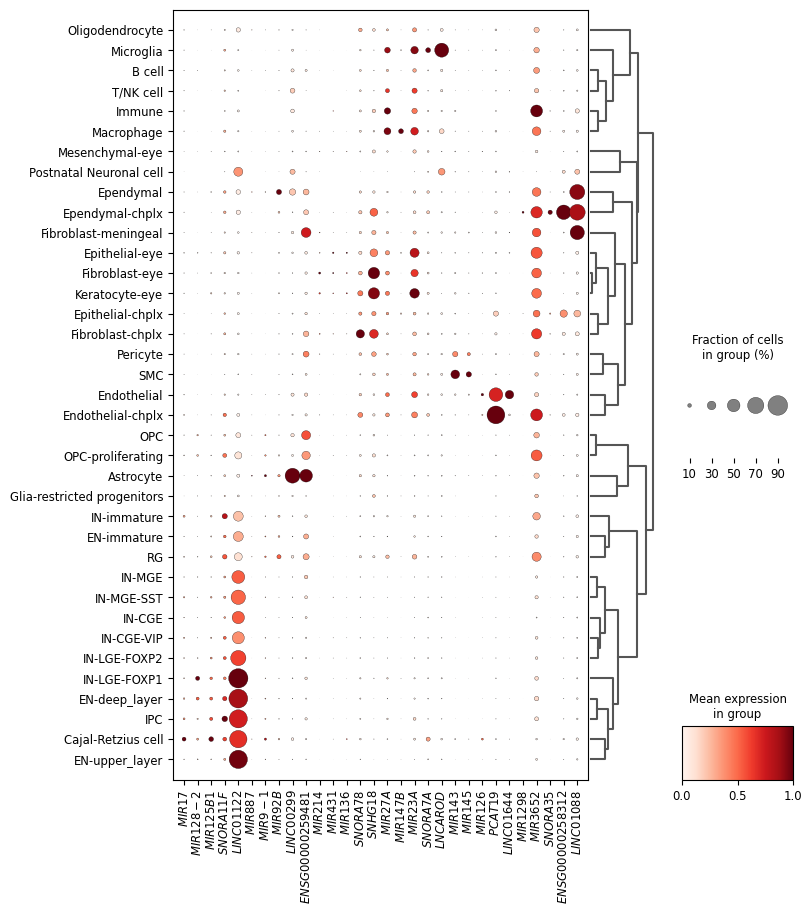

In [19]:
gene_list = ["MIR17", "MIR128-2", "MIR125B1", "SNORA11F","LINC01122",
    "MIR887", "MIR9-1", "MIR92B","LINC00299", "ENSG00000259481",
    "MIR214", "MIR431", "MIR136","SNORA78", "SNHG18",
    "MIR27A", "MIR147B", "MIR23A", "SNORA7A","LNCAROD",
    "MIR143", "MIR145", "MIR126",  "PCAT19", "LINC01644", 
    "MIR1298",  "MIR3652", "SNORA35","ENSG00000258312","LINC01088",
                    
]


dp = sc.pl.dotplot(adata, gene_list, 'cell_type', 
   show=False, 
   figsize=(8, 10),
   standard_scale="var",
   dendrogram=True)

# Get the correct axis
ax = dp['mainplot_ax']
genes_italic = [r"$\mathit{{{}}}$".format(g) for g in gene_list]
ax.set_xticklabels(genes_italic, rotation=90)

plt.tight_layout()
plt.savefig("dotplot_cell_type_annotated_for supp.pdf")
plt.show()


/tmp/ipykernel_6658/3545000362.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expr = expr_df.groupby("group").mean()


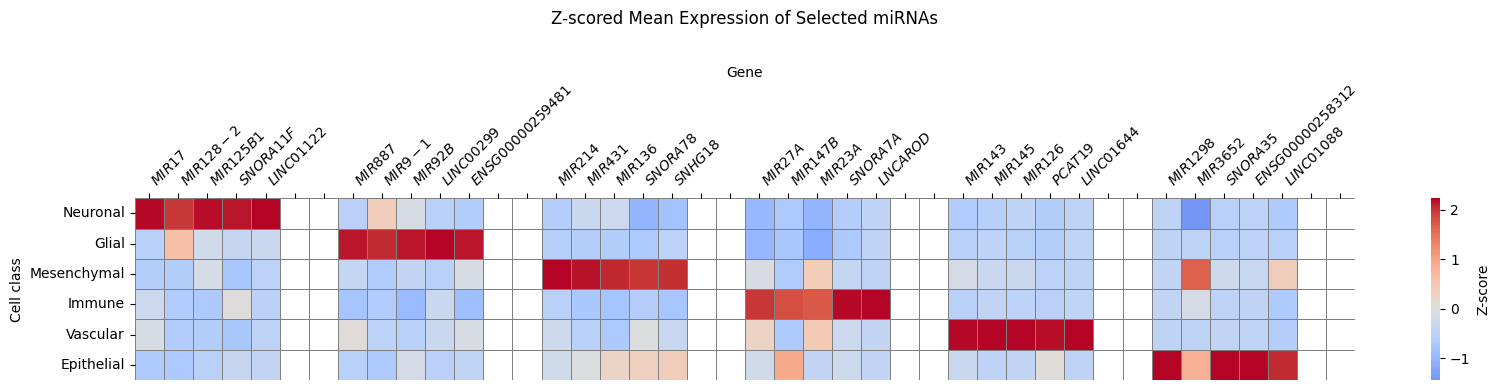

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Step 1: Define miRNAs
gene_list = ["MIR17", "MIR128-2", "MIR125B1", "SNORA11F","LINC01122",
    "MIR887", "MIR9-1", "MIR92B","LINC00299", "ENSG00000259481",
    "MIR214", "MIR431", "MIR136","SNORA78", "SNHG18",
    "MIR27A", "MIR147B", "MIR23A", "SNORA7A","LNCAROD",
    "MIR143", "MIR145", "MIR126",  "PCAT19", "LINC01644", 
    "MIR1298",  "MIR3652", "SNORA35","ENSG00000258312","LINC01088",
                    
]
# Create a copy of the expression matrix (can be raw, normalized, etc.)
# Use `.raw.X` if you want raw counts: expr = adata.raw[:, gene_list].X
expr = adata[:, gene_list].X

# Get the group annotations
cell_classes = adata.obs["cell_class"]

# Create DataFrame
expr_df = pd.DataFrame(expr.toarray() if hasattr(expr, "toarray") else expr,
                       index=adata.obs_names,
                       columns=gene_list)

# Add group info
expr_df["group"] = cell_classes.values

# Group by and compute mean expression per gene
mean_expr = expr_df.groupby("group").mean()

from scipy.stats import zscore

# mean_expr: rows = cell types, columns = genes
# We transpose to compute z-score **per gene**
zscore_expr = pd.DataFrame(
    zscore(mean_expr.T, axis=1),  # z-score across cell types for each gene
    index=mean_expr.T.index,      # gene names
    columns=mean_expr.T.columns   # cell classes
)


# Step 1: Define miRNAs

# Step 2: Subset and transpose
zscore_subset = zscore_expr.reindex(gene_list)  # rows = genes
zscore_subset_T = zscore_subset.T                       # now rows = cell types, columns = genes

desired_class_order = [
    "Neuronal", "Glial", "Mesenchymal", "Immune",  "Vascular","Epithelial"
]

# Filter and reorder rows (some classes might be missing depending on gene presence)
ordered_index = [cls for cls in desired_class_order if cls in zscore_subset_T.index]
zscore_subset_T = zscore_subset_T.loc[ordered_index]
# Step 3: Insert NaN columns as white gaps
gap_prefix = "GAP_"
new_columns = []
gap_counter = 0

for i, gene in enumerate(zscore_subset_T.columns):
    new_columns.append(gene)
    if (i + 1) % 5 == 0 and i < len(zscore_subset_T.columns) - 1:
        for j in range(2):  # Insert two gap columns per break
            gap_col = f"{gap_prefix}{gap_counter}_{j}"
            zscore_subset_T[gap_col] = np.nan
            new_columns.append(gap_col)
        gap_counter += 1

# Reorder columns to insert the gaps where we want them
zscore_subset_T = zscore_subset_T[new_columns]

# Step 4: Plot
plt.figure(figsize=(len(new_columns) * 0.4, 4))
ax = sns.heatmap(zscore_subset_T, cmap="coolwarm", center=0,
                 linewidths=0.5, linecolor='gray',
                 cbar_kws={"label": "Z-score"})

# Move x-tick labels to the top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

# Format tick labels
labels = [r"$\it{{{}}}$".format(col) if not col.startswith("GAP_") else "" for col in new_columns]
ax.set_xticks(np.arange(len(new_columns)) + 0.5)
ax.set_xticklabels(labels, rotation=45, ha='left', fontsize=10)
plt.xlabel("Gene")
plt.ylabel("Cell class")
plt.title("Z-scored Mean Expression of Selected miRNAs", pad=30)
plt.tight_layout()
plt.savefig("miRNA_all_cell_class_with_gaps.pdf", bbox_inches="tight")
plt.show()

### Neuronal

/tmp/ipykernel_6658/3851529832.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_6658/3851529832.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


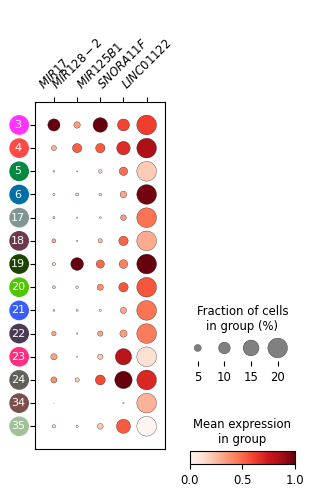

In [21]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define neuronal cell types
neuronal_types = [
    'Cajal-Retzius cell',
    'EN-deep_layer',
    'EN-immature',
    'EN-upper_layer',
    'IN-CGE',
    'IN-CGE-VIP',
    'IN-LGE-FOXP1',
    'IN-LGE-FOXP2',
    'IN-MGE',
    'IN-MGE-SST',
    'IN-immature',
    'IPC',
    'Postnatal Neuronal cell',
    'RG'
]

# Subset AnnData to only neuronal cells
neuronal_adata = adata[adata.obs["cell_type"].isin(neuronal_types), :]

# Define genes of interest
genes_of_interest = ["MIR17", "MIR128-2", "MIR125B1", "SNORA11F","LINC01122"]
genes_present = [gene for gene in genes_of_interest if gene in neuronal_adata.var_names]

# Get mapping of cell type to color
cell_type_categories = adata.obs["cell_type"].cat.categories
cell_type_colors = dict(zip(cell_type_categories, adata.uns["cell_type_colors"]))

# Create dotplot
dotplot_obj = sc.pl.dotplot(
    neuronal_adata,
    var_names=genes_present,
    groupby="cell_type",
    standard_scale="var",
    dot_max=0.2,
    cmap="Reds",
    dendrogram=False,
    return_fig=True,
    show=False
)

# Set compact figure size
#dotplot_obj.fig.set_size_inches(4, 3)

# Generate the figure
dotplot_obj.make_figure()

# Access the main plot axis
ax = dotplot_obj.ax_dict["mainplot_ax"]

# Remove y-axis labels
ax.set_yticklabels([])

# Get y-tick positions and corresponding labels
yticks = ax.get_yticks()
cell_types = dotplot_obj.categories

# Create cell type number mapping
cell_type_to_number = {ct: str(i) for i, ct in enumerate(cell_type_categories, 1)}

# Draw colored dots and numeric labels
for ytick, cell_type in zip(yticks, cell_types):
    color = cell_type_colors.get(cell_type, "gray")
    number = cell_type_to_number.get(cell_type, "?")

    # Circle
    ax.add_patch(mpatches.Circle((-1, ytick), radius=0.395, color=color,
                                 transform=ax.transData, clip_on=False))
    # Number
    ax.text(-1.05, ytick, number, va='center', ha='center', fontsize=8, color="white") #fontweight="bold",

# Fix aspect for round circles
ax.set_aspect("equal", adjustable="box")

# Get the correct axis

genes_italic = [r"$\mathit{{{}}}$".format(g) for g in genes_of_interest]
ax.set_xticklabels(genes_italic, rotation=45)
ax.xaxis.set_ticks_position('top')      # Show x-ticks on top
ax.xaxis.set_label_position('top') 
plt.tight_layout()

# Save and show
plt.tight_layout()
plt.savefig("miRNA_neuronal.pdf")
plt.show()


### Glial

/tmp/ipykernel_6658/3005845687.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


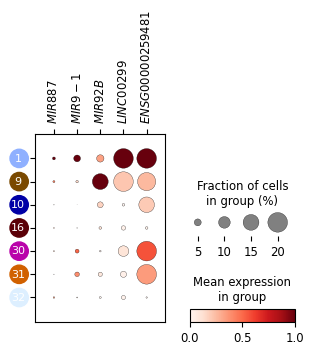

In [22]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define glial cell types
glial_types = [
    'Astrocyte',
    'Ependymal',
    'Ependymal-chplx',
    'Glia-restricted progenitors',
    'OPC',
    'OPC-proliferating',
    'Oligodendrocyte',
]

# Subset AnnData to only glial cells
glial_adata = adata[adata.obs["cell_type"].isin(glial_types), :]

# Define genes of interest
genes_of_interest = ["MIR887", "MIR9-1", "MIR92B","LINC00299", "ENSG00000259481"]
genes_present = [gene for gene in genes_of_interest if gene in glial_adata.var_names]

# Get mapping of cell type to color
cell_type_categories = adata.obs["cell_type"].cat.categories
cell_type_colors = dict(zip(cell_type_categories, adata.uns["cell_type_colors"]))

# Create dotplot
dotplot_obj = sc.pl.dotplot(
    glial_adata,
    var_names=genes_present,
    groupby="cell_type",
    standard_scale="var",
    dot_max=0.2,
    cmap="Reds",
    dendrogram=False,
    return_fig=True,
    show=False
)

# Draw the plot
dotplot_obj.make_figure()
#dotplot_obj.fig.set_size_inches(3, 3)
# Access the main plot axis
ax = dotplot_obj.ax_dict["mainplot_ax"]

# Remove the text labels on the y-axis
ax.set_yticklabels([])

# Get y-tick positions and corresponding labels
yticks = ax.get_yticks()
cell_types = dotplot_obj.categories  # This matches the y-axis order

# Map cell type to number
cell_type_to_number = {ct: str(i) for i, ct in enumerate(cell_type_categories, 1)}

# Draw colored dots with numeric labels
for ytick, cell_type in zip(yticks, cell_types):
    color = cell_type_colors.get(cell_type, "gray")
    number = cell_type_to_number.get(cell_type, "?")

    # Colored circle
    ax.add_patch(mpatches.Circle((-1, ytick), radius=0.395, color=color,
                                 transform=ax.transData, clip_on=False))
    ax.set_aspect('equal', adjustable='datalim')
    # Numeric label
    ax.text(-1.05, ytick, number, va='center', ha='center', fontsize=8,  color="white") #fontweight="bold",

genes_italic = [r"$\mathit{{{}}}$".format(g) for g in genes_of_interest]
ax.set_xticklabels(genes_italic, rotation=90)
ax.xaxis.set_ticks_position('top')      # Show x-ticks on top
ax.xaxis.set_label_position('top') 
# Save and show
plt.tight_layout()
plt.savefig("miRNA_glial.pdf")
plt.show()


### Mesenchymal

/tmp/ipykernel_6658/345376049.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


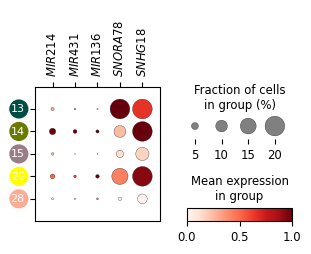

In [23]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define mesenchymal/stromal cell types
mesenchymal_types = [
    'Fibroblast-chplx',
    'Fibroblast-eye',
    'Fibroblast-meningeal',
    'Keratocyte-eye',
    'Mesenchymal-eye',
]

# Subset AnnData to only mesenchymal cells
mesenchymal_adata = adata[adata.obs["cell_type"].isin(mesenchymal_types), :]

# Define genes of interest (adjust if needed)
genes_of_interest = [ "MIR214", "MIR431", "MIR136","SNORA78", "SNHG18"]
genes_present = [gene for gene in genes_of_interest if gene in mesenchymal_adata.var_names]

# Get mapping of cell type to color
cell_type_categories = adata.obs["cell_type"].cat.categories
cell_type_colors = dict(zip(cell_type_categories, adata.uns["cell_type_colors"]))

# Create dotplot
dotplot_obj = sc.pl.dotplot(
    mesenchymal_adata,
    var_names=genes_present,
    groupby="cell_type",
    standard_scale="var",
    dot_max=0.2,
    cmap="Reds",
    dendrogram=False,
    return_fig=True,
    show=False
)

# Optional: set figure size
#dotplot_obj.fig.set_size_inches(4, 2.5)

# Draw the plot
dotplot_obj.make_figure()

# Access the main axis
ax = dotplot_obj.ax_dict["mainplot_ax"]

# Remove y-axis labels
ax.set_yticklabels([])

# Get y-tick positions and the plotted mesenchymal cell types
yticks = ax.get_yticks()
cell_types = dotplot_obj.categories

# Map all cell types to numbers
cell_type_to_number = {ct: str(i) for i, ct in enumerate(cell_type_categories, 1)}

# Draw colored dots and numeric labels
for ytick, cell_type in zip(yticks, cell_types):
    color = cell_type_colors.get(cell_type, "gray")
    number = cell_type_to_number.get(cell_type, "?")

    # Draw colored circle
    ax.add_patch(mpatches.Circle((-1, ytick), radius=0.395, color=color,
                                 transform=ax.transData, clip_on=False))
    # Draw numeric label
    ax.text(-1.05, ytick, number, va='center', ha='center', fontsize=8,  color="white") #fontweight="bold",

# Fix aspect ratio for round circles

ax.set_aspect("equal", adjustable="box")
genes_italic = [r"$\mathit{{{}}}$".format(g) for g in genes_of_interest]
ax.set_xticklabels(genes_italic, rotation=90)
ax.xaxis.set_ticks_position('top')      # Show x-ticks on top
ax.xaxis.set_label_position('top')
# Save and display
plt.tight_layout()
plt.savefig("miRNA_mesenchymal.pdf")
plt.show()


#### Immune

/tmp/ipykernel_6658/1803312672.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


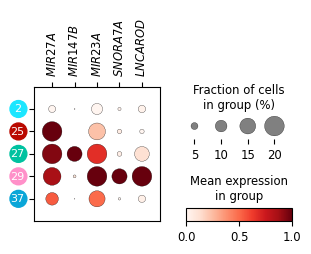

In [24]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define immune cell types
immune_types = [
    'B cell',
    'Immune',
    'Macrophage',
    'Microglia',
    'T/NK cell'
]

# Subset AnnData to only immune cells
immune_adata = adata[adata.obs["cell_type"].isin(immune_types), :]

# Define genes of interest (adjust if needed)
genes_of_interest = ["MIR27A", "MIR147B", "MIR23A", "SNORA7A","LNCAROD", ]
genes_present = [gene for gene in genes_of_interest if gene in immune_adata.var_names]

# Get mapping of cell type to color
cell_type_categories = adata.obs["cell_type"].cat.categories
cell_type_colors = dict(zip(cell_type_categories, adata.uns["cell_type_colors"]))

# Create dotplot
dotplot_obj = sc.pl.dotplot(
    immune_adata,
    var_names=genes_present,
    groupby="cell_type",
    standard_scale="var",
    dot_max=0.2,
    cmap="Reds",
    dendrogram=False,
    return_fig=True,
    show=False
)

# Optionally set a compact size
#dotplot_obj.fig.set_size_inches(4, 3)

# Generate the figure
dotplot_obj.make_figure()

# Access the main axis
ax = dotplot_obj.ax_dict["mainplot_ax"]

# Remove y-axis labels
ax.set_yticklabels([])

# Get tick positions and immune cell types used in the plot
yticks = ax.get_yticks()
cell_types = dotplot_obj.categories

# Map all cell types to numbers
cell_type_to_number = {ct: str(i) for i, ct in enumerate(cell_type_categories, 1)}

# Draw colored circles and numeric labels
for ytick, cell_type in zip(yticks, cell_types):
    color = cell_type_colors.get(cell_type, "gray")
    number = cell_type_to_number.get(cell_type, "?")

    # Draw colored dot
    ax.add_patch(mpatches.Circle((-1, ytick), radius=0.375, color=color,
                                 transform=ax.transData, clip_on=False))
    # Add numeric label
    ax.text(-1.05, ytick, number, va='center', ha='center', fontsize=8,  color="white")

# Fix aspect for round dots
ax.set_aspect("equal", adjustable="box")
genes_italic = [r"$\mathit{{{}}}$".format(g) for g in genes_of_interest]
ax.set_xticklabels(genes_italic, rotation=90)
ax.xaxis.set_ticks_position('top')      # Show x-ticks on top
ax.xaxis.set_label_position('top') 
# Save and show
plt.tight_layout()
plt.savefig("miRNA_immune.pdf")
plt.show()


#### Vascular

/tmp/ipykernel_6658/1326172533.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


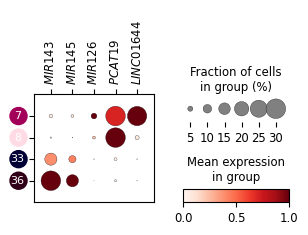

In [25]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define vascular cell types
vascular_types = [
    'Endothelial',
    'Endothelial-chplx',
    'Pericyte',
    'SMC',
]

# Subset AnnData to only vascular cells
vascular_adata = adata[adata.obs["cell_type"].isin(vascular_types), :]

# Define genes of interest
genes_of_interest = ["MIR143", "MIR145", "MIR126",  "PCAT19", "LINC01644"]
genes_present = [gene for gene in genes_of_interest if gene in vascular_adata.var_names]

# Get mapping of cell type to color
cell_type_categories = adata.obs["cell_type"].cat.categories
cell_type_colors = dict(zip(cell_type_categories, adata.uns["cell_type_colors"]))

# Create dotplot
dotplot_obj = sc.pl.dotplot(
    vascular_adata,
    var_names=genes_present,
    groupby="cell_type",
    standard_scale="var",
    dot_max=0.3,
    cmap="Reds",
    dendrogram=False,
    return_fig=True,
    show=False
)

# Set compact figure size
#dotplot_obj.fig.set_size_inches(4, 2.5)

# Draw the figure
dotplot_obj.make_figure()

# Access the main axis
ax = dotplot_obj.ax_dict["mainplot_ax"]

# Remove y-axis labels
ax.set_yticklabels([])

# Get tick positions and cell types
yticks = ax.get_yticks()
cell_types = dotplot_obj.categories

# Map cell types to numbers
cell_type_to_number = {ct: str(i) for i, ct in enumerate(cell_type_categories, 1)}

# Draw colored circles and numeric labels
for ytick, cell_type in zip(yticks, cell_types):
    color = cell_type_colors.get(cell_type, "gray")
    number = cell_type_to_number.get(cell_type, "?")

    ax.add_patch(mpatches.Circle((-1, ytick), radius=0.395, color=color,
                                 transform=ax.transData, clip_on=False))
    ax.text(-1.05, ytick, number, va='center', ha='center', fontsize=8,  color="white") #fontweight="bold",

# Set aspect for round circles
#ax.set_aspect("equal", adjustable="box")

ax.set_aspect("equal", adjustable="box")
genes_italic = [r"$\mathit{{{}}}$".format(g) for g in genes_of_interest]
ax.set_xticklabels(genes_italic, rotation=90)
ax.xaxis.set_ticks_position('top')      # Show x-ticks on top
ax.xaxis.set_label_position('top') 
# Save and show
plt.tight_layout()
plt.savefig("miRNA_vascular.pdf")
plt.show()


### Epithelial

/tmp/ipykernel_6658/345615467.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


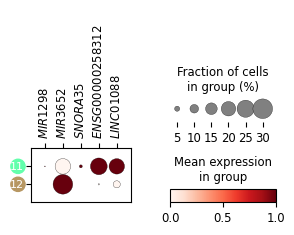

In [26]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define epithelial cell types
epithelial_types = [
    'Epithelial-chplx',
    'Epithelial-eye',
    #'Mesenchymal-eye',
]

# Subset AnnData to only epithelial cells
epithelial_adata = adata[adata.obs["cell_type"].isin(epithelial_types), :]

# Define genes of interest
genes_of_interest = ["MIR1298",  "MIR3652", "SNORA35","ENSG00000258312","LINC01088",]

# Filter to genes that exist in the dataset
genes_present = [gene for gene in genes_of_interest if gene in epithelial_adata.var_names]

# Get mapping of cell type to color
cell_type_categories = adata.obs["cell_type"].cat.categories
cell_type_colors = dict(zip(cell_type_categories, adata.uns["cell_type_colors"]))

# Create dotplot
dotplot_obj = sc.pl.dotplot(
    epithelial_adata,
    var_names=genes_present,
    groupby="cell_type",
    standard_scale="var",
    dot_max=0.3,
    cmap="Reds",
    dendrogram=False,
    return_fig=True,
    show=False
)

# Draw the plot
dotplot_obj.make_figure()
#dotplot_obj.fig.set_size_inches(3, 3)
# Access the main plot axis
ax = dotplot_obj.ax_dict["mainplot_ax"]

# Remove the text labels on the y-axis
ax.set_yticklabels([])

# Get y-tick positions and corresponding labels
yticks = ax.get_yticks()
cell_types = dotplot_obj.categories  # This matches the y-axis order

# Map cell type to number
cell_type_to_number = {ct: str(i) for i, ct in enumerate(cell_type_categories, 1)}

# Draw colored dots with numeric labels
for ytick, cell_type in zip(yticks, cell_types):
    color = cell_type_colors.get(cell_type, "gray")
    number = cell_type_to_number.get(cell_type, "?")

    # Colored circle
    ax.add_patch(mpatches.Circle((-1, ytick), radius=0.395, color=color,
                                 transform=ax.transData, clip_on=False))
    ax.set_aspect('equal', adjustable='datalim')
    # Numeric label
    ax.text(-1.05, ytick, number, va='center', ha='center', fontsize=8,  color="white") #fontweight="bold",

ax.set_aspect("equal", adjustable="box")
genes_italic = [r"$\mathit{{{}}}$".format(g) for g in genes_of_interest]
ax.set_xticklabels(genes_italic, rotation=90)
ax.xaxis.set_ticks_position('top')      # Show x-ticks on top
ax.xaxis.set_label_position('top')
# Save and show
plt.tight_layout()
plt.savefig("miRNA_epi_ery.pdf", bbox_inches="tight")
plt.show()


## Figue 4c

### Plot Cell type specific DEGs

In [13]:
import pandas as pd

# Load the previously saved DEGs from CSV
deg_df = pd.read_csv("TSB_rank_genes_groups_cell_type.csv")

# Ensure 'names' column matches index in adata.var (i.e., gene identifiers)
deg_df["biotype"] = deg_df["names"].map(adata.var["biotype"])


In [14]:
deg_df = deg_df[(deg_df['logfoldchanges'] >= 1) & (deg_df['pvals_adj'] <= 0.01)]
deg_df["biotype"] = deg_df["biotype"].str.strip()

# Define the biotypes of interest
biotypes_to_keep = ["miRNA", "snoRNA", "snRNA", "tRNA", "scaRNA", "histone_RNA", "lncRNA"]

# Filter the DataFrame
deg_df = deg_df[deg_df["biotype"].isin(biotypes_to_keep)]

# Count number of DEGs per (group, biotype) pair
deg_counts = (
    deg_df.groupby(["group", "biotype"])
    .size()
    .reset_index(name="n_DEGs")
)
deg_counts

group biotype  n_DEGs
0    Astrocyte  lncRNA    1746
1    Astrocyte   miRNA      13
2    Astrocyte  scaRNA       1
3    Astrocyte   snRNA       2
4    Astrocyte  snoRNA       1
..         ...     ...     ...
194  T/NK cell   miRNA      12
195  T/NK cell  scaRNA       2
196  T/NK cell   snRNA      13
197  T/NK cell  snoRNA       3
198  T/NK cell    tRNA       2

[199 rows x 3 columns]

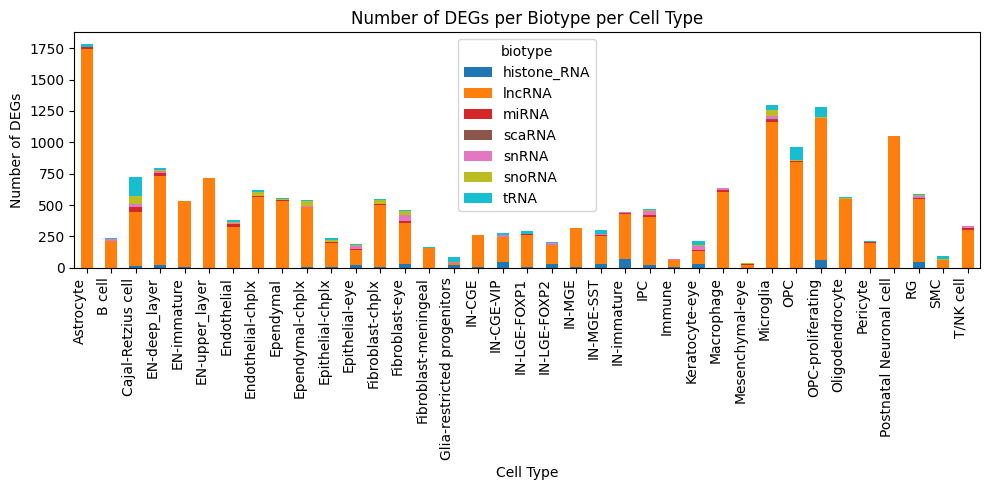

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot to wide format
pivot_df = deg_counts.pivot(index="group", columns="biotype", values="n_DEGs").fillna(0)

# Sort groups by total DEGs (optional)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).index]

# Plot
pivot_df.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="tab10")
plt.ylabel("Number of DEGs")
plt.xlabel("Cell Type")
plt.title("Number of DEGs per Biotype per Cell Type")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig("DEG_number_per_cell_type.pdf", bbox_inches="tight")
plt.show()


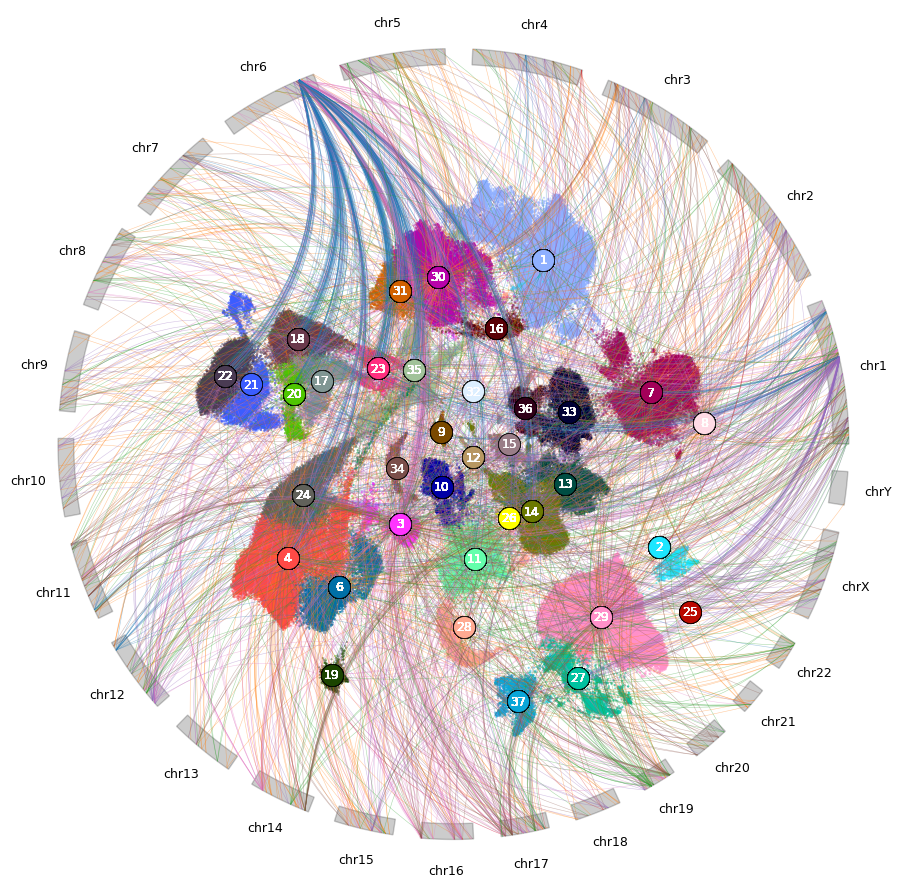

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import scanpy as sc


deg_df_top2000 = (
    deg_df
    .sort_values(by="pvals_adj")  # or use 'scores' to sort by effect size
    .groupby("biotype")
    .head(400)
    .copy()
)

# --- 1. Setup gene list ---
genes_of_interest = [
    'MIR137', 'SLC2A1', 'SLC2A1-DT', 'SLC2A12', 'SLC2A14', 'SLC2A13',
    'MIR17HG', 'TGM2', 'SLC2A10', 'SLC2A11', 'MIR16-2', 'MIR16-1',
    'MIR17', 'MIR92A1', 'MIR629', 'MIR92A2'
]
genes_found = adata.var_names.intersection(genes_of_interest)

# --- 2. Compute UMAP centroids of high-expressing cells ---
records = []
for gene in genes_found:
    expr = adata[:, gene].X
    expr = expr.toarray().flatten() if hasattr(expr, "toarray") else expr.flatten()
    if (expr > 0).sum() < 3:
        continue
    threshold = np.percentile(expr, 90)
    high_expr_cells = expr > threshold
    umap_coords = adata.obsm['X_umap'][high_expr_cells]
    umap_center = umap_coords.mean(axis=0)
    chrom = str(adata.var.loc[gene, 'chromosome'])
    start = adata.var.loc[gene, 'start']
    records.append({
        'gene': gene,
        'chromosome': chrom,
        'position': start,
        'umap_x': umap_center[0],
        'umap_y': umap_center[1]
    })
df = pd.DataFrame(records)
df['biotype'] = df['gene'].map(adata.var['biotype'].to_dict())

# --- 3. Setup chromosome layout with gaps ---
chromosomes = [f"chr{i}" for i in range(1, 23)] + ['chrX', 'chrY']
num_chromosomes = len(chromosomes)
chrom_lengths = {
    'chr1': 248_956_422, 'chr2': 242_193_529, 'chr3': 198_295_559, 'chr4': 190_214_555,
    'chr5': 181_538_259, 'chr6': 170_805_979, 'chr7': 159_345_973, 'chr8': 145_138_636,
    'chr9': 138_394_717, 'chr10': 133_797_422, 'chr11': 135_086_622, 'chr12': 133_275_309,
    'chr13': 114_364_328, 'chr14': 107_043_718, 'chr15': 101_991_189, 'chr16': 90_338_345,
    'chr17': 83_257_441, 'chr18': 80_373_285, 'chr19': 58_617_616, 'chr20': 64_444_167,
    'chr21': 46_709_983, 'chr22': 50_818_468, 'chrX': 156_040_895, 'chrY': 57_227_415
}



total_length = sum(chrom_lengths.values())
gap_angle = np.deg2rad(4)
total_gap = gap_angle * len(chromosomes)
usable_angle = 2 * np.pi - total_gap

# Compute individual arc angles
angle_per_bp = usable_angle / total_length
chrom_arc_angles = {chrom: chrom_lengths[chrom] * angle_per_bp for chrom in chromosomes}

# Compute cumulative start angles
angle_offsets = {}
current_angle = 0
for chrom in chromosomes:
    angle_offsets[chrom] = current_angle
    current_angle += chrom_arc_angles[chrom] + gap_angle


def compute_angle(chrom, pos):
    if chrom not in angle_offsets or chrom not in chrom_arc_angles:
        return np.nan
    return angle_offsets[chrom] + (pos / chrom_lengths[chrom]) * chrom_arc_angles[chrom]


df['chromosome'] = df['chromosome'].astype(str)
df['angle'] = df.apply(lambda row: compute_angle(row['chromosome'], row['position']), axis=1)

# --- 4. Normalize UMAP and project inside circle ---
df['umap_x_norm'] = (df['umap_x'] - df['umap_x'].mean()) / df['umap_x'].std()
df['umap_y_norm'] = (df['umap_y'] - df['umap_y'].mean()) / df['umap_y'].std()
radius = 5
circle_center_x = df['umap_x_norm'].max() + radius + 2
circle_center_y = df['umap_y_norm'].mean()
umap_center = df[['umap_x_norm', 'umap_y_norm']].values.mean(axis=0)
vecs = df[['umap_x_norm', 'umap_y_norm']].values - umap_center
scale_factor = (radius * 0.8) / np.linalg.norm(vecs, axis=1).max()
scaled_vecs = vecs * scale_factor
df['circle_x'] = circle_center_x + scaled_vecs[:, 0]
df['circle_y'] = circle_center_y + scaled_vecs[:, 1]


# Normalize entire UMAP for consistent positioning
umap_all = adata.obsm['X_umap']
umap_all_norm = (umap_all - umap_all.mean(axis=0)) / umap_all.std(axis=0)

# Scale to fit inside the genomic circle
umap_center_all = umap_all_norm.mean(axis=0)
vecs_all = umap_all_norm - umap_center_all
scale_factor_all = (radius * 0.8) / np.linalg.norm(vecs_all, axis=1).max()
scaled_vecs_all = vecs_all * scale_factor_all

# Project to circular space
umap_x_inside = circle_center_x + scaled_vecs_all[:, 0]
umap_y_inside = circle_center_y + scaled_vecs_all[:, 1]

# Map cell_class to colors
cell_classes = adata.obs['cell_type'].unique()
#cmap = plt.get_cmap('tab10') if len(cell_classes) <= 10 else plt.get_cmap('tab40')
#class_colors = {cls: cmap(i % cmap.N) for i, cls in enumerate(cell_classes)}

# Ensure 'cell_type_lvl1' is categorical
adata.obs["cell_type"] = adata.obs["cell_type"].astype("category")

# Extract Scanpy's color order
scanpy_colors = adata.uns["cell_type_colors"]
scanpy_categories = adata.obs["cell_type"].cat.categories

# Create a mapping of cell type → color
class_colors = dict(zip(scanpy_categories, scanpy_colors))

# Map to each cell
cell_class_flat = adata.obs["cell_type"].astype(str)
colors = cell_class_flat.map(class_colors)


# --- 5. Plot setup ---
fig, ax = plt.subplots(figsize=(12, 9))
# Plot all cells with their class color
ax.scatter(umap_x_inside, umap_y_inside, s=0.2, c=colors, alpha=0.6, label='Cells by type')

# Cell type legend
#celltype_legend = [Line2D([0], [0], marker='o', color='w', label=cls,
#                          markerfacecolor=class_colors[cls], markersize=6)
#                   for cls in cell_classes]
#legend1 = ax.legend(handles=celltype_legend, title='Cell Type', loc='lower left', bbox_to_anchor=(0.01, 0.01))
#ax.add_artist(legend1)  # Keep it when adding second legend


#ax.scatter(umap_x_inside, umap_y_inside, s=4, color='lightgray', alpha=0.5, label='All cells')
#ax.scatter(df['circle_x'], df['circle_y'], s=80, color='dodgerblue', label='UMAP gene centers')

# --- 6. Draw disconnected genome arcs ---
arc_thickness = 0.2
for chrom in chromosomes:
    theta_start = angle_offsets[chrom]
    theta_end = theta_start + chrom_arc_angles[chrom]
    arc = np.linspace(theta_start, theta_end, 100)
    # then same as before to draw thick arc using outer and inner radius
    outer_r = radius
    inner_r = radius - arc_thickness
    x_outer = circle_center_x + outer_r * np.cos(arc)
    y_outer = circle_center_y + outer_r * np.sin(arc)
    x_inner = circle_center_x + inner_r * np.cos(arc[::-1])
    y_inner = circle_center_y + inner_r * np.sin(arc[::-1])
    x_arc = np.concatenate([x_outer, x_inner])
    y_arc = np.concatenate([y_outer, y_inner])
    ax.fill(x_arc, y_arc, color='black', alpha=0.2, edgecolor='black')
    mid_theta = (theta_start + theta_end) / 2
    ax.text(circle_center_x + (outer_r + 0.4) * np.cos(mid_theta),
            circle_center_y + (outer_r + 0.4) * np.sin(mid_theta),
            chrom, ha='center', va='center', fontsize=9)


from matplotlib.lines import Line2D

# Subset to only DEGs with valid biotype and found in adata
deg_genes = deg_df_top2000[deg_df_top2000["names"].isin(adata.var_names) & deg_df_top2000["biotype"].notna()].copy()
deg_genes["angle"] = deg_genes.apply(
    lambda row: compute_angle(str(adata.var.loc[row["names"], "chromosome"]),
                              adata.var.loc[row["names"], "start"])
    if row["names"] in adata.var_names else np.nan,
    axis=1
)

# Compute UMAP centroids for each gene's expressing cell class (from 'group')
cell_type_to_number = {ct: str(i) for i, ct in enumerate(scanpy_categories, 1)}

deg_centroids = []
for _, row in deg_genes.iterrows():
    gene = row["names"]
    group = row["group"]
    if gene not in adata.var_names:
        continue
    cells_in_group = adata.obs["cell_type"] == group
    if cells_in_group.sum() < 3:
        continue
    umap_coords = adata.obsm["X_umap"][cells_in_group]
    umap_center = umap_coords.mean(axis=0)
    deg_centroids.append({
        "gene": gene,
        "group": group,
        "umap_x": umap_center[0],
        "umap_y": umap_center[1],
        "biotype": row["biotype"],
        "angle": row["angle"]
    })

df_deg_lines = pd.DataFrame(deg_centroids)
# --- Color curved connectors by biotype ---
biotypes = df_deg_lines['biotype'].dropna().unique()
cmap = plt.get_cmap('tab10') if len(biotypes) <= 10 else plt.get_cmap('tab20')
color_map = {bt: cmap(i % cmap.N) for i, bt in enumerate(sorted(biotypes))}


# Normalize UMAP coordinates
df_deg_lines["umap_x_norm"] = (df_deg_lines["umap_x"] - umap_all[:,0].mean()) / umap_all[:,0].std()
df_deg_lines["umap_y_norm"] = (df_deg_lines["umap_y"] - umap_all[:,1].mean()) / umap_all[:,1].std()

# Project to circular space
vecs = df_deg_lines[["umap_x_norm", "umap_y_norm"]].values - umap_center_all
scaled_vecs = vecs * scale_factor_all
df_deg_lines["circle_x"] = circle_center_x + scaled_vecs[:, 0]
df_deg_lines["circle_y"] = circle_center_y + scaled_vecs[:, 1]

# Plot centroid dots for each DEG, colored by associated cell type
for _, row in df_deg_lines.iterrows():
    if pd.isna(row['circle_x']) or pd.isna(row['group']):
        continue
    color = class_colors.get(row['group'], 'gray')
    # Plot colored circle
    ax.scatter(row['circle_x'], row['circle_y'], color=color, s=250, edgecolor='black', linewidth=0.5, zorder=10)

    # Plot number inside
    cell_number = cell_type_to_number.get(row['group'], "?")
    ax.text(row['circle_x'], row['circle_y'], cell_number, ha='center', va='center',
        fontsize=9, color='white', zorder=11)

# Draw connections for DEGs
for _, row in df_deg_lines.iterrows():
    if pd.isna(row['angle']):
        continue
    jitter = np.random.normal(scale=0.05, size=2)
    start = (row['circle_x'] + jitter[0], row['circle_y'] + jitter[1])

    #start = (row['circle_x'], row['circle_y'])
    end = (
        circle_center_x + radius * np.cos(row['angle']),
        circle_center_y + radius * np.sin(row['angle'])
    )
    ctrl_x = (start[0] + end[0]) / 2 + 0.3 * (end[1] - start[1])
    ctrl_y = (start[1] + end[1]) / 2 - 0.3 * (end[0] - start[0])
    path = Path([start, (ctrl_x, ctrl_y), end], [Path.MOVETO, Path.CURVE3, Path.CURVE3])
    patch = PathPatch(path, edgecolor=color_map.get(row['biotype'], 'gray'),
                      lw=.4, alpha=0.4, facecolor='none')
    ax.add_patch(patch)
    #ax.text(end[0], end[1], row['gene'], fontsize=7, ha='center', va='center',
    #        color=color_map.get(row['biotype'], 'gray'))


# --- 8. Final touches ---
ax.set_aspect('equal')
ax.axis('off')
#biotype_legend = [Line2D([0], [0], color=color_map[bt], lw=2, label=bt) for bt in biotypes]
#ax.legend(handles=biotype_legend, title='Gene Biotype', loc='upper left', bbox_to_anchor=(1.02, 1))

#plt.title('UMAP inside Detached Genomic Arcs by Biotype')
plt.tight_layout()
plt.savefig("circle_of_RNA_v2.png", dpi=300, bbox_inches="tight")

plt.show()


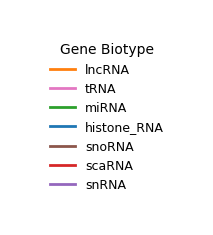

In [298]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Create legend handles (reusing your existing code)
biotype_legend = [Line2D([0], [0], color=color_map[bt], lw=2, label=bt) for bt in biotypes]

# Create a new figure just for the legend
fig, ax = plt.subplots(figsize=(2.5, len(biotype_legend) * 0.4))  # Adjust size as needed
legend = ax.legend(
    handles=biotype_legend,
    title='Gene Biotype',
    loc='center',
    frameon=False,
    fontsize=9,
    title_fontsize=10
)

# Remove axes
ax.axis('off')

# Save just the legend figure
plt.savefig("gene_biotype_legend_only.pdf", bbox_inches='tight')
plt.show()